In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN requires channel dimension
x_train_cnn = x_train.reshape(-1,28,28,1)
x_test_cnn = x_test.reshape(-1,28,28,1)

# One-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
def build_cnn(activation='relu',
              optimizer='adam',
              dropout_rate=0.25,
              use_bn=False):

    model = models.Sequential()

    model.add(layers.Conv2D(32, (3,3), activation=activation,
                            input_shape=(28,28,1)))
    model.add(layers.Conv2D(64, (3,3), activation=activation))
    model.add(layers.MaxPooling2D((2,2)))

    if use_bn:
        model.add(layers.BatchNormalization())

    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation=activation))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [5]:
cnn_sigmoid = build_cnn(activation='sigmoid', optimizer=Adam())
hist_sigmoid = cnn_sigmoid.fit(
    x_train_cnn, y_train_cat,
    epochs=10,
    validation_data=(x_test_cnn, y_test_cat),
    batch_size=128
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.1036 - loss: 2.4338 - val_accuracy: 0.0974 - val_loss: 2.3049
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1057 - loss: 2.3050 - val_accuracy: 0.1135 - val_loss: 2.3026
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1078 - loss: 2.3041 - val_accuracy: 0.0980 - val_loss: 2.3042
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1057 - loss: 2.3040 - val_accuracy: 0.1135 - val_loss: 2.3034
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1069 - loss: 2.3043 - val_accuracy: 0.1010 - val_loss: 2.3038
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1097 - loss: 2.3036 - val_accuracy: 0.1135 - val_loss: 2.3028
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1099 - loss: 2.3042 - val_accuracy: 0.1135 - val_loss: 2.3027
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1051 - loss: 2.3045 - val_accuracy: 

In [6]:
cnn_tanh = build_cnn(activation='tanh', optimizer=Adam())
hist_tanh = cnn_tanh.fit(
    x_train_cnn, y_train_cat,
    epochs=10,
    validation_data=(x_test_cnn, y_test_cat),
    batch_size=128
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8921 - loss: 0.3458 - val_accuracy: 0.9790 - val_loss: 0.0698
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9823 - loss: 0.0595 - val_accuracy: 0.9831 - val_loss: 0.0555
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9895 - loss: 0.0364 - val_accuracy: 0.9843 - val_loss: 0.0496
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9927 - loss: 0.0268 - val_accuracy: 0.9871 - val_loss: 0.0413
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9948 - loss: 0.0210 - val_accuracy: 0.9861 - val_loss: 0.0452
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9951 - loss: 0.0175 - val_accuracy: 0.9863 - val_loss: 0.0448
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9953 - loss: 0.0170 - val_accuracy: 0.9861 - val_loss: 0.0467
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9956 - loss: 0.0151 - val_accuracy: 0

In [7]:
cnn_relu = build_cnn(activation='relu', optimizer=Adam())
hist_relu = cnn_relu.fit(
    x_train_cnn, y_train_cat,
    epochs=10,
    validation_data=(x_test_cnn, y_test_cat),
    batch_size=128
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8941 - loss: 0.3474 - val_accuracy: 0.9829 - val_loss: 0.0495
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9853 - loss: 0.0491 - val_accuracy: 0.9844 - val_loss: 0.0469
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9896 - loss: 0.0322 - val_accuracy: 0.9874 - val_loss: 0.0376
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9942 - loss: 0.0207 - val_accuracy: 0.9884 - val_loss: 0.0344
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9940 - loss: 0.0168 - val_accuracy: 0.9888 - val_loss: 0.0349
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9966 - loss: 0.0109 - val_accuracy: 0.9889 - val_loss: 0.0410
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9959 - loss: 0.0124 - val_accuracy: 0.9915 - val_loss: 0.0317
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9974 - loss: 0.0090 - val_accuracy: 0

In [8]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title + " Loss")
    plt.legend(['Train','Test'])

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title + " Accuracy")
    plt.legend(['Train','Test'])

    plt.show()


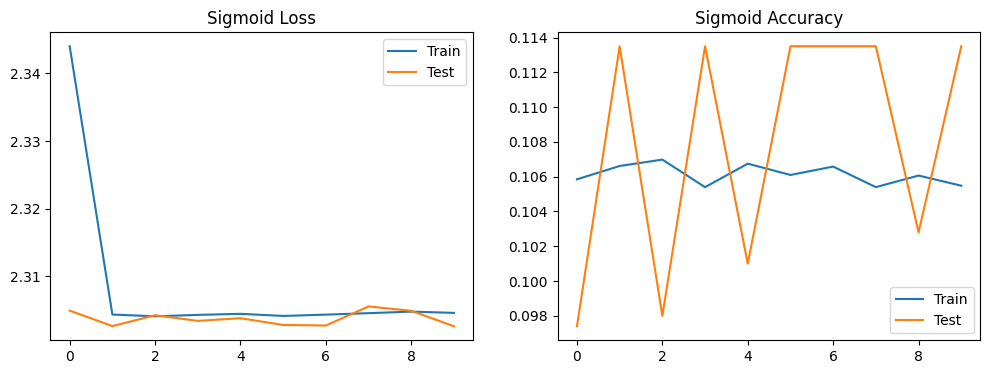

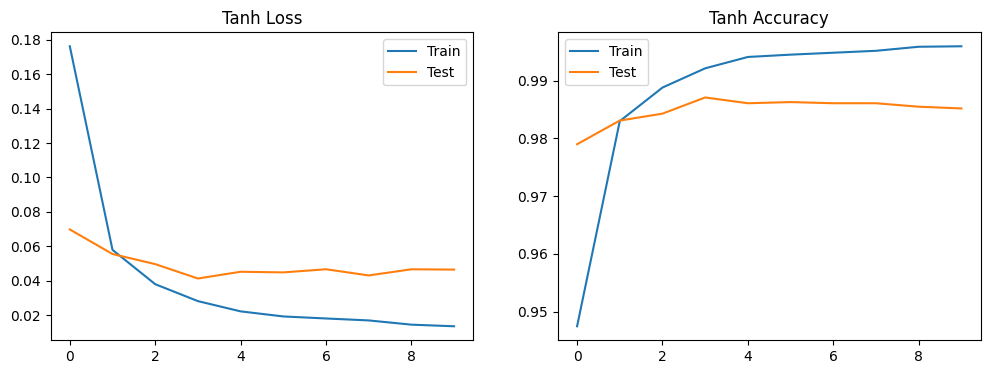

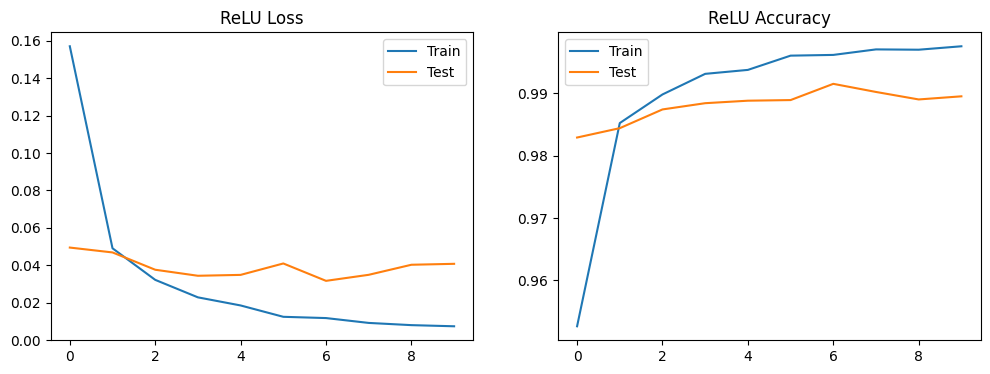

In [9]:
plot_history(hist_sigmoid, "Sigmoid")
plot_history(hist_tanh, "Tanh")
plot_history(hist_relu, "ReLU")


TASK 1 COMPLETED, USING RELU AS IT IT BEST AMONGST THESE


In [10]:
cnn_sgd = build_cnn(
    activation='relu',
    optimizer=SGD(learning_rate=0.01)
)

hist_sgd = cnn_sgd.fit(
    x_train_cnn, y_train_cat,
    epochs=10,
    validation_data=(x_test_cnn, y_test_cat),
    batch_size=128
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5764 - loss: 1.4749 - val_accuracy: 0.9111 - val_loss: 0.3046
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9011 - loss: 0.3286 - val_accuracy: 0.9271 - val_loss: 0.2435
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9243 - loss: 0.2565 - val_accuracy: 0.9482 - val_loss: 0.1774
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9362 - loss: 0.2108 - val_accuracy: 0.9557 - val_loss: 0.1516
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9465 - loss: 0.1832 - val_accuracy: 0.9604 - val_loss: 0.1348
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9528 - loss: 0.1597 - val_accuracy: 0.9572 - val_loss: 0.1344
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9570 - loss: 0.1428 - val_accuracy: 0.9636 - val_loss: 0.1185
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9610 - loss: 0.1305 - val_accuracy: 0

In [11]:
cnn_momentum = build_cnn(
    activation='relu',
    optimizer=SGD(learning_rate=0.01, momentum=0.9)
)

hist_momentum = cnn_momentum.fit(
    x_train_cnn, y_train_cat,
    epochs=10,
    validation_data=(x_test_cnn, y_test_cat),
    batch_size=128
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7375 - loss: 0.8466 - val_accuracy: 0.9687 - val_loss: 0.0972
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9695 - loss: 0.1031 - val_accuracy: 0.9820 - val_loss: 0.0565
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9798 - loss: 0.0635 - val_accuracy: 0.9860 - val_loss: 0.0430
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9862 - loss: 0.0449 - val_accuracy: 0.9870 - val_loss: 0.0388
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9876 - loss: 0.0367 - val_accuracy: 0.9877 - val_loss: 0.0361
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9903 - loss: 0.0308 - val_accuracy: 0.9886 - val_loss: 0.0334
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9900 - val_loss: 0.0285
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9932 - loss: 0.0219 - val_accuracy: 0

In [12]:
cnn_adam = build_cnn(
    activation='relu',
    optimizer=Adam()
)

hist_adam = cnn_adam.fit(
    x_train_cnn, y_train_cat,
    epochs=10,
    validation_data=(x_test_cnn, y_test_cat),
    batch_size=128
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8911 - loss: 0.3576 - val_accuracy: 0.9823 - val_loss: 0.0560
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9836 - loss: 0.0537 - val_accuracy: 0.9900 - val_loss: 0.0314
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9906 - loss: 0.0313 - val_accuracy: 0.9896 - val_loss: 0.0328
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9931 - loss: 0.0223 - val_accuracy: 0.9885 - val_loss: 0.0321
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9945 - loss: 0.0167 - val_accuracy: 0.9892 - val_loss: 0.0382
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9967 - loss: 0.0113 - val_accuracy: 0.9909 - val_loss: 0.0277
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9969 - loss: 0.0103 - val_accuracy: 0.9884 - val_loss: 0.0418
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9962 - loss: 0.0108 - val_accuracy: 0

TASK 2 COMPLETED


In [13]:
model1 = build_cnn(use_bn=False, dropout_rate=0.0)
hist1 = model1.fit(x_train_cnn, y_train_cat,
                   epochs=10,
                   validation_data=(x_test_cnn, y_test_cat))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9279 - loss: 0.2331 - val_accuracy: 0.9847 - val_loss: 0.0451
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9883 - loss: 0.0361 - val_accuracy: 0.9874 - val_loss: 0.0396
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9930 - loss: 0.0202 - val_accuracy: 0.9898 - val_loss: 0.0331
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9960 - loss: 0.0130 - val_accuracy: 0.9892 - val_loss: 0.0405
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9969 - loss: 0.0093 - val_accuracy: 0.9878 - val_loss: 0.0466
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9970 - loss: 0.0091 - val_accuracy: 0.9886 - val_loss: 0.0414
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9984 - loss: 0.0050 - val_accuracy: 0.9906 - val_loss: 0.0342
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9987 - loss: 0.0036 -

In [14]:
model2 = build_cnn(use_bn=False, dropout_rate=0.1)
hist2 = model2.fit(x_train_cnn, y_train_cat,
                   epochs=10,
                   validation_data=(x_test_cnn, y_test_cat))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9268 - loss: 0.2332 - val_accuracy: 0.9843 - val_loss: 0.0488
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9880 - loss: 0.0383 - val_accuracy: 0.9872 - val_loss: 0.0424
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9887 - val_loss: 0.0357
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9950 - loss: 0.0149 - val_accuracy: 0.9899 - val_loss: 0.0328
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9956 - loss: 0.0126 - val_accuracy: 0.9893 - val_loss: 0.0399
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9970 - loss: 0.0085 - val_accuracy: 0.9894 - val_loss: 0.0366
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9977 - loss: 0.0067 - val_accuracy: 0.9897 - val_loss: 0.0399
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9977 - loss: 0.0069 -

In [15]:
model3 = build_cnn(use_bn=True, dropout_rate=0.25)
hist3 = model3.fit(x_train_cnn, y_train_cat,
                   epochs=10,
                   validation_data=(x_test_cnn, y_test_cat))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9391 - loss: 0.2032 - val_accuracy: 0.9833 - val_loss: 0.0538
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9866 - loss: 0.0432 - val_accuracy: 0.9806 - val_loss: 0.0703
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9917 - loss: 0.0274 - val_accuracy: 0.9892 - val_loss: 0.0395
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 0.9903 - val_loss: 0.0378
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9935 - loss: 0.0200 - val_accuracy: 0.9880 - val_loss: 0.0503
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9956 - loss: 0.0129 - val_accuracy: 0.9869 - val_loss: 0.0594
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9899 - val_loss: 0.0435
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9963 - loss: 0.0131 -

TASK 3 COMPLETED

COMPARSION TABLE:

In [16]:
results = []

def get_acc(model):
    _, acc = model.evaluate(x_test_cnn, y_test_cat, verbose=0)
    return round(acc*100,2)

results.append(["Sigmoid + Adam", 10, get_acc(cnn_sigmoid)])
results.append(["Tanh + Adam", 10, get_acc(cnn_tanh)])
results.append(["ReLU + Adam", 10, get_acc(cnn_relu)])
results.append(["ReLU + SGD", 10, get_acc(cnn_sgd)])
results.append(["ReLU + Momentum", 10, get_acc(cnn_momentum)])
results.append(["ReLU + Adam (BN+Dropout)", 10, get_acc(model3)])

df = pd.DataFrame(results,
                  columns=["Experiment","Epochs","Final Accuracy (%)"])
df


,Experiment,Epochs,Final Accuracy (%)
0,Sigmoid + Adam,10,11.35
1,Tanh + Adam,10,98.52
2,ReLU + Adam,10,98.95
3,ReLU + SGD,10,97.22
4,ReLU + Momentum,10,98.86
5,ReLU + Adam (BN+Dropout),10,99.03
